In [5]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

from treemind import Explainer
from treemind.plot import (
    feature_plot,
    interaction_plot,
    interaction_scatter_plot,   
)


In [6]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

model = LGBMClassifier(verbose=-1, is_unbalance=True)
model.fit(X, y)

y_predict = model.predict(X, raw_score=True)

In [7]:
explainer = Explainer()
explainer(model)

In [8]:
explainer.count_node(order=1).head()

,column1_index,count
0,21,1587
1,27,1448
2,23,1367
3,22,1358
4,1,1071


In [9]:
explainer.count_node(order=2).head()

,column1_index,column2_index,count
0,21,22,830
1,21,23,808
2,23,27,759
3,21,27,741
4,1,27,707


In [10]:
feature_21_df = explainer.analyze_feature(21)
feature_21_df.head()

,worst_texture_lb,worst_texture_ub,value,std,count
0,-inf,18.460,3.185128,8.479232,402.24
1,18.460,19.300,3.160656,8.519873,402.39
2,19.300,19.415,3.119814,8.489262,401.85
3,19.415,20.225,3.101601,8.490439,402.55
4,20.225,20.360,2.772929,8.711773,433.16


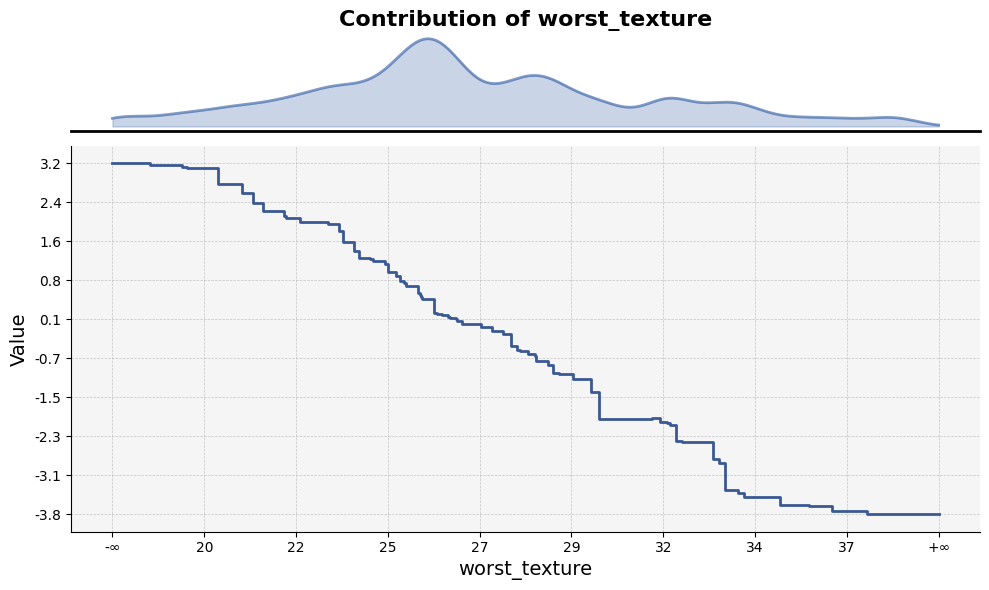

In [12]:
feature_plot(feature_21_df, show_range=True, figsize=(10,6))

In [13]:
feature_21_27_df = explainer.analyze_feature([21,27])
feature_21_27_df.head()

,worst_texture_lb,worst_texture_ub,worst_concave_points_lb,worst_concave_points_ub,value,std,count
0,-inf,18.46,-inf,0.058860,4.929324,7.679424,355.40
1,-inf,18.46,0.05886,0.059630,4.928594,7.679772,355.34
2,-inf,18.46,0.05963,0.065540,4.923128,7.679783,355.03
3,-inf,18.46,0.06554,0.069320,4.912888,7.682064,354.70
4,-inf,18.46,0.06932,0.069775,4.912888,7.682064,354.70


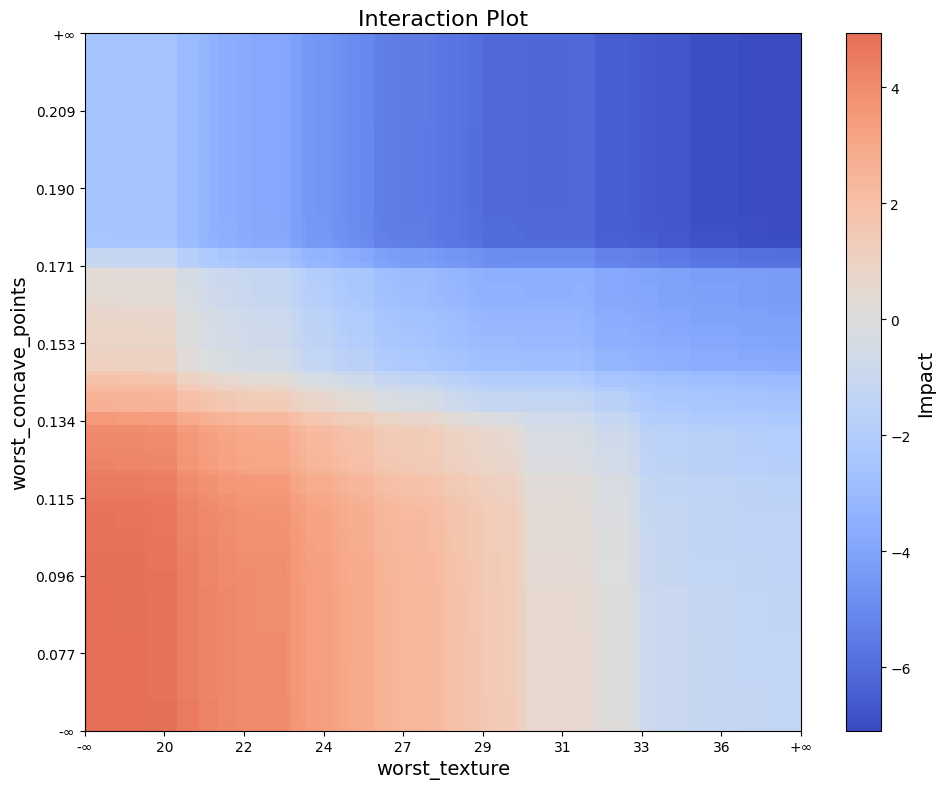

In [14]:
interaction_plot(feature_21_27_df)

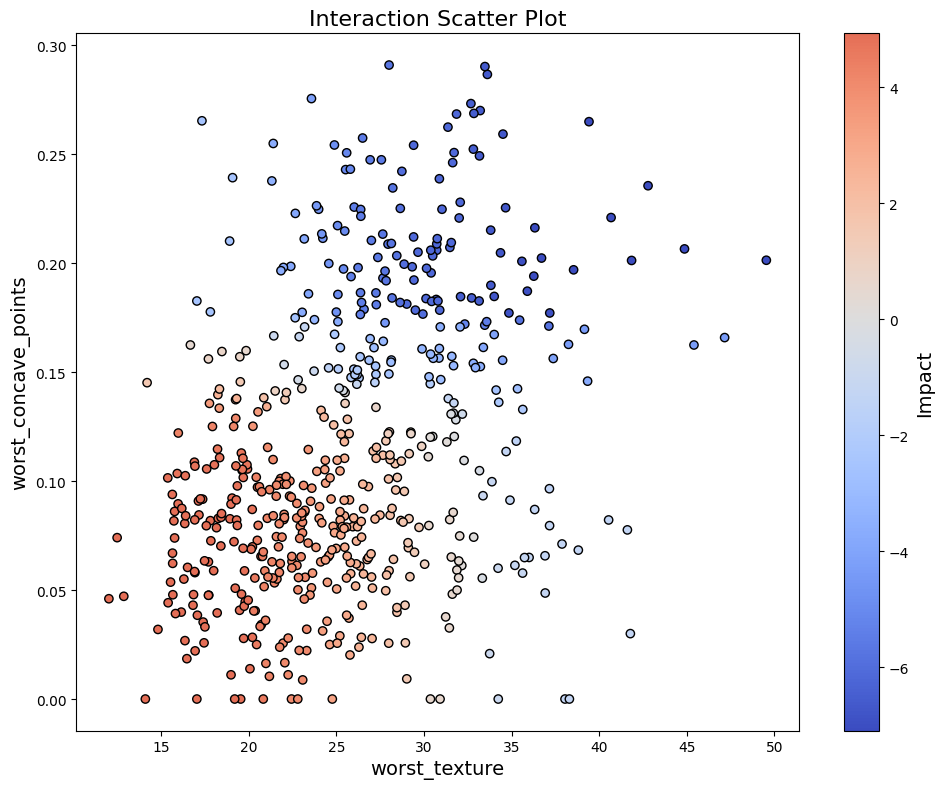

In [16]:
interaction_scatter_plot(X, feature_21_27_df, 21, 27)